# Confidence Intervals and Estimation

This workbook is built to show what Confidence Intervals actually are as a means of estimation of certain parameters.

In [1]:
%matplotlib inline
from scipy.stats import norm
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import numpy as np

#set font size of plots to 22
matplotlib.rcParams.update({"font.size":22})

## Data Generation and Plotting

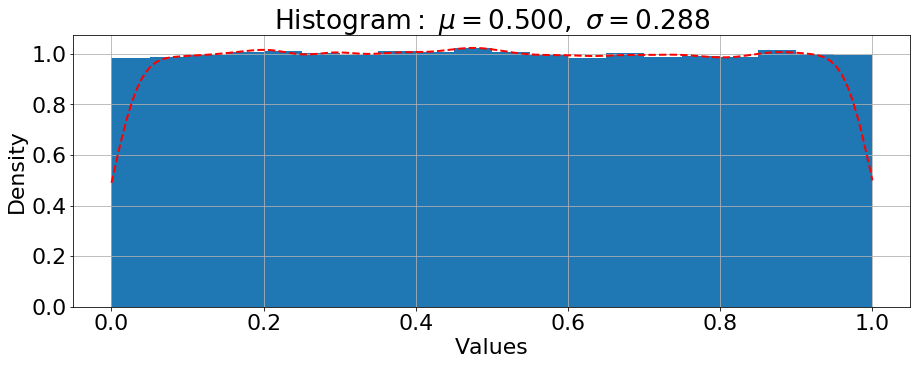

In [26]:
# TODO: generate n random values from a uniform distribution from a to b.
n = 100000
a = 0
b = 1
data = np.random.uniform(a, b, n) # generated dataset
# data = np.random.beta(b, a, n)

#visualize the histogram of the data
fig = plt.figure(figsize=(15,5))
num, bins, patches = plt.hist(data, 20,normed=True)


# TODO: find the mean and stdev of the generated data
mean = np.mean(data)
stdev = np.std(data)

#add a line corresponding to the probability density function
density = gaussian_kde(data)
xs = np.linspace(np.min(data),np.max(data),200)
plt.plot(xs, density(xs), 'r--',linewidth=2)

#plot labels
plt.xlabel('Values')
plt.ylabel('Density')
plt.title(r'$\mathrm{Histogram:}\ \mu=%.3f,\ \sigma=%.3f$' %(mean, stdev))
plt.grid(True)


plt.show()

## Data Sampling

In [37]:
#sample from the data
sample_size = 10
number_of_samples = 100

samples = []
for i in range(number_of_samples):
    samples.append(list(np.random.choice(data, size=sample_size)))

## Generating Interval Estimates

(-1, 101)

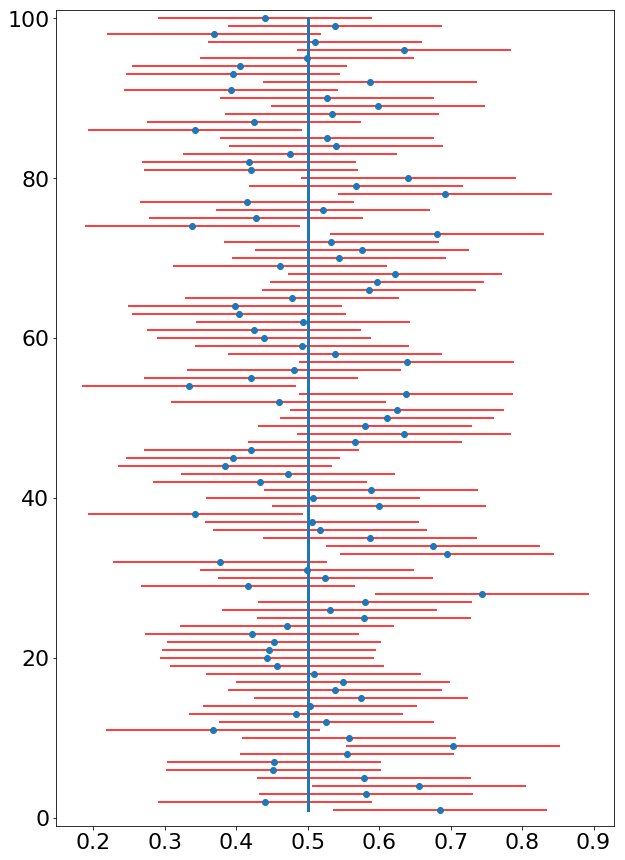

In [43]:
ci = []

# TODO: Set the alpha/confidence of the interval here
alpha = 0.90

# TODO:
# sample_means should contain the means of each sample
# sample_err should contain the e for each sample as stated in the confidence interval equation
# for the Z-table lookup function, look up the scipy.stats.norm.ppf function definition
sample_means = []
for s in samples:
    sample_means.append(np.mean(s))
    
sample_err = (norm.ppf((1 - alpha) / 2) * (stdev / np.sqrt(sample_size)))

# Plotting
nplot = 100

y = np.arange(1,nplot + 1,1)
x = sample_means[0:nplot]
plt.figure(figsize=(10,15))
plt.errorbar(x, y, xerr=sample_err, fmt='o', ecolor='r')
plt.plot(np.repeat([mean],len(y)),y, label="Mean",linewidth=3.0)
plt.ylim((-1,nplot+1))

## Analysis and Guide Questions

Try to change around the values of the workbook and analyze the changes caused the final plot. Try different datasets, different parameters, try to glean as much information from the experiment as possible.

1) When taking one interval with a confidence level $\alpha$, what is the probability it contains the true mean?
> There is an alpha percent probability that the true mean lies in the interval of the sample. 

2) What do confidence intervals really mean and why should we use them?
> Confidence intervals help us determine where a given population parameter can fall inside a range of values.

3) When taking a single sample and giving a confidence interval, what are we really saying?
> There is an alpha percent probability that the true mean lies in the interval of the sample. 
